# Machine Learning for Classification
## Credit Scoring
*URL = "https://github.com/gastonstat/CreditScoring"*

**Context:**
- Predict behavior to retain customers. The dataset was obtained from Github.

**Content:**
- The project contains two datasets in csv format (raw data, and cleaned data), as well as the R scripts for the analysis.

 Column Name | Description 
 -------- | ----------- 
1 Status | credit status; 0="unk", 1="ok", 2="default" 
2 Seniority	| job seniority (years)
3 Home | type of home ownership; 0="unk", 1="rent", 2="owner", 3="priv", 4="ignore", 5="parents", 6="other"
4 Time | time of requested loan
5 Age | client's age
6 Marital | marital status; 0="unk", 1="single", 2="married", 3="widow", 4="separated", 5="divorced"
7 Records | existance of records; 0="unk", 1="no_rec", 2="yes_rec"
8 Job | type of job; 0="unk", 1="fixed", 2="partime", 3="freelance", 4="others"
9 Expenses | amount of expenses
10 Income | amount of income
11 Assets | amount of assets
12 Debt | amount of debt
13 Amount | amount requested of loan
14 Price | price of good

**Model:**
- Decision Tree

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from pprint import pprint

## Data Preparation

In [2]:
df = pd.read_csv('CreditScoring.csv')

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Categorical variables are represented by numbers. 

Let's convert it:

In [5]:
for c in ['status', 'home', 'marital', 'records', 'job']:
    print(f"{c}: ({df[c].nunique()})")
    print(df[c].value_counts())
    print("-"*25)

status: (3)
1    3200
2    1254
0       1
Name: status, dtype: int64
-------------------------
home: (7)
2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: home, dtype: int64
-------------------------
marital: (6)
2    3241
1     978
4     130
3      67
5      38
0       1
Name: marital, dtype: int64
-------------------------
records: (2)
1    3682
2     773
Name: records, dtype: int64
-------------------------
job: (5)
1    2806
3    1024
2     452
4     171
0       2
Name: job, dtype: int64
-------------------------


In [6]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [8]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [9]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [10]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [11]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


After this, all the categorical variables have strings, not numbers

Let's look at numberical variables:  

In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


99999999 indicate missing values. Let's replace it by `NaN`: 

In [13]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

Now the stats are more meaninful

In [14]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Let's look at the target variable

In [15]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

There's one record for which the status is unknown. Let's remove it - it's not useful for us

In [303]:
df = df[df.status != 'unk']
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [304]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [305]:
df = df.fillna(0)
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

Now we're ready to prepare the data for training:

* First, do train-validation-test split
* Then, apply one-hot encoding to categorical features and get the feature matrix 

In [18]:
from sklearn.model_selection import train_test_split

**Train-Valid-Test Split:**
The term `validation dataset` is primarily used to assess the performance of models during hyperparameter tuning and data preparation, while the term `test dataset` is primarily used to evaluate the performance of a final, tuned model in comparison to other final models.

$$
   \fbox{\thickspace\enspace\quad\qquad\qquad\qquad\qquad\qquad df \ (100) \qquad\qquad\qquad\qquad\qquad\quad\enspace\thickspace}
$$

$$\Downarrow$$

$$
   \fbox{\medspace\enspace\qquad\quad\qquad df\_train\_full \ (80) \qquad\qquad\quad\enspace\medspace}
   \fbox{\quad df\_test \ (20) \quad}
$$

$$\Downarrow$$

$$
   \fbox{\medspace\qquad\quad df\text{\textunderscore}train \ (60) \quad\quad\medspace}
   \fbox{\quad df\_val \ (20) \quad}
   \fbox{\quad df\_test \ (20) \quad}
$$

In [294]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
print("df ({}) => df_train_full ({}) + df_test ({})".format(len(df), len(df_train_full), len(df_test)))

df (4454) => df_train_full (3563) + df_test (891)


In [295]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)
print("df_train_full ({}) => df_train ({}) + df_val ({})".format(len(df_train_full), len(df_train), len(df_val)))

df_train_full (3563) => df_train (2672) + df_val (891)


In [296]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

del df_train['status']
del df_val['status']

print("[df_train -> y_train] ({}) + [df_val -> y_val] ({})".format(len(y_train), len(y_val)))

[df_train -> y_train] (2672) + [df_val -> y_val] (891)


For One-Hot Encoding, we'll use `DictVectorizer`

In [23]:
from sklearn.feature_extraction import DictVectorizer

In [306]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

In [307]:
dict_train[0]

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [308]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [171]:
type(df_train_full), type(df_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [175]:
type(df_train), type(df_val)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [168]:
type(X_train), type(X_val), type(y_train), type(y_val)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

Now we're ready to train a model. We'll start with decision trees

## Decision trees

We'll use `DecisionTreeClassifier` and for evaluating the quality of our models, we'll use AUC


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [29]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [30]:
x_i = df_train.iloc[0].to_dict()
pprint(x_i)

{'age': 36,
 'amount': 1000,
 'assets': 10000.0,
 'debt': 0.0,
 'expenses': 75,
 'home': 'owner',
 'income': 0.0,
 'job': 'freelance',
 'marital': 'married',
 'price': 1400,
 'records': 'no',
 'seniority': 10,
 'time': 36}


In [31]:
assess_risk(x_i)

'ok'

Let's fit the tree with default parameters

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

To get the predictions (probabilities), we use `predict_proba`. Let's check AUC on validation data:

In [33]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6437419776706789

And on train data:

In [34]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

That's a case of _overfitting_ - our model on the training data performs perfectly, but fails on validation

Let's change the depth parameter: restring the size of the tree to 2 levels:

In [35]:
from sklearn.tree import export_text

In [36]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print(f"train auc: {auc:.3f}")

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f"val auc: {auc:.3f}")

train auc: 0.705
val auc: 0.669


In [37]:
print(export_text(dt, feature_names=dv.feature_names_))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: False
|   |--- job=partime >  0.50
|   |   |--- class: True
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



#### Finding the best split.
Common measures of impurity are Gini, Entropy => Information Gain, and Misclassification Rate.

**Desision tree learning algorithm:**
- Find the best split.
- Stopping criteria preventing from overfitting when:
    - Group already pure.
    - Tree reached depth limit.
    - Group too small to split.

In [38]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [39]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [40]:
from IPython.display import display

In [41]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

for T in Ts:
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    print(f"assets ({T}):")
    print(df_left)
    print()
    print(df_left.status.value_counts(normalize=True))
    print()
    print(df_right)
    print()
    print(df_right.status.value_counts(normalize=True))
    print("-"*25)

assets (0):
   assets   status
2       0  default

default    1.0
Name: status, dtype: float64

   assets   status
0    8000  default
1    2000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

ok         0.571429
default    0.428571
Name: status, dtype: float64
-------------------------
assets (2000):
   assets   status
1    2000  default
2       0  default

default    1.0
Name: status, dtype: float64

   assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

ok         0.666667
default    0.333333
Name: status, dtype: float64
-------------------------
assets (3000):
   assets   status
1    2000  default
2       0  default
7    3000  default

default    1.0
Name: status, dtype: float64

   assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok

ok         0.8
default    0.2
Name: status, dtype: float6

T | Decision Left | Impurity Left | Decision Right | Impurity Right | AVG
---: | ---: | ---: | ---: | ---: | ---:
0 | default | 0% | ok | 43% | 21%
2000 | default | 0% | ok | 33% | 16%
3000 | default | 0% | ok | 20% | 10%
4000 | default | 25% | ok | 25% | 25%
5000 | default | 50% | ok | 50% | 25%
8000 | default | 43% | ok | 0% | 21%

Best Split: T = 3000, Impurity (Misclassification Rate) = 10%

In [42]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [43]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [44]:
Thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
} 

for feature, Ts in Thresholds.items():
    for T in Ts:
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
        print(f"{feature} ({T}):")
        print(df_left)
        print()
        print(df_left.status.value_counts(normalize=True))
        print()
        print(df_right)
        print()
        print(df_right.status.value_counts(normalize=True))
        print("-"*25)

assets (0):
   assets  debt   status
2       0  1000  default

default    1.0
Name: status, dtype: float64

   assets  debt   status
0    8000  3000  default
1    2000  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  default

ok         0.571429
default    0.428571
Name: status, dtype: float64
-------------------------
assets (2000):
   assets  debt   status
1    2000  1000  default
2       0  1000  default

default    1.0
Name: status, dtype: float64

   assets  debt   status
0    8000  3000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  default

ok         0.666667
default    0.333333
Name: status, dtype: float64
-------------------------
assets (3000):
   assets  debt   status
1    2000  1000  default
2       0  1000  default
7    3000  2000  default

default    1.0
Name: status, dtype: float64

   assets  debt   status
0  

Feature | T | Decision Left | Impurity Left | Decision Right | Impurity Right | AVG
---: | ---: | ---: | ---: | ---: | ---: | ---:
assets | 0 | default | 0% | ok | 43% | 21%
assets | 2000 | default | 0% | ok | 33% | 16%
assets | 3000 | default | 0% | ok | 20% | 10%
assets | 4000 | default | 25% | ok | 25% | 25%
assets | 5000 | default | 50% | ok | 50% | 25%
assets | 8000 | default | 43% | ok | 0% | 21%
dept | 500 | ok | 0% | default | 43% | 21%
dept | 1000 | ok | 33% | default | 0% | 16%
dept | 2000 | ok | 43% | default | 0% | 21%

Best Split: T = 3000, Impurity (Misclassification Rate) = 10%

### Tuning parameters

<p align="center">
    <img src="https://4.bp.blogspot.com/-x-uiAbUSV1I/W_T2FrGUM2I/AAAAAAAAAf8/RzWPE3q94SkpUfdbNq8h5JmFdRnrsx-LQCLcBGAs/s1600/a.PNG">
</p>

In [89]:
# Compare the max depth parameters looking for the best preformance.
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.745
  10 -> 0.710
  15 -> 0.679
  20 -> 0.656
None -> 0.667


In [84]:
# Compare minnimum samples leaf looking for the best performance.
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (m, auc))

   1 -> 0.761
   5 -> 0.761
  10 -> 0.761
  15 -> 0.764
  20 -> 0.761
  50 -> 0.753
 100 -> 0.756
 200 -> 0.747


In [90]:
# We notice that the max depth = 6 with minumum leaf node = 15 provide the best performance. 
for d in [4, 5, 6]:
    print('depth: (%s)' % d)

    for m in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=m)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%4s -> %.3f' % (m, auc))
    
    print("-"*15)

depth: (4)
   1 -> 0.761
   5 -> 0.761
  10 -> 0.761
  15 -> 0.764
  20 -> 0.761
  50 -> 0.753
 100 -> 0.756
 200 -> 0.747
---------------
depth: (5)
   1 -> 0.766
   5 -> 0.768
  10 -> 0.762
  15 -> 0.772
  20 -> 0.774
  50 -> 0.768
 100 -> 0.763
 200 -> 0.759
---------------
depth: (6)
   1 -> 0.761
   5 -> 0.763
  10 -> 0.778
  15 -> 0.785
  20 -> 0.774
  50 -> 0.772
 100 -> 0.776
 200 -> 0.768
---------------


In [91]:
scores = []

for d in [4, 5, 6]:
    for m in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=m)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, m, auc))

columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910
5,4,50,0.753457
6,4,100,0.755937
7,4,200,0.747260
8,5,1,0.766496
9,5,5,0.767755


In [94]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
19,6,15,0.785095
18,6,10,0.778299
22,6,100,0.776434
20,6,20,0.774279
12,5,20,0.773537


In [101]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns='max_depth', values='auc')
df_scores_pivot

max_depth,4,5,6
min_samples_leaf,,,
1,0.761283,0.766496,0.743839
5,0.761283,0.767755,0.760290
10,0.761283,0.762276,0.778299
15,0.763726,0.772405,0.785095
20,0.760910,0.773537,0.774279
50,0.753457,0.766753,0.770289
100,0.755937,0.763384,0.776434
200,0.747260,0.759073,0.768267


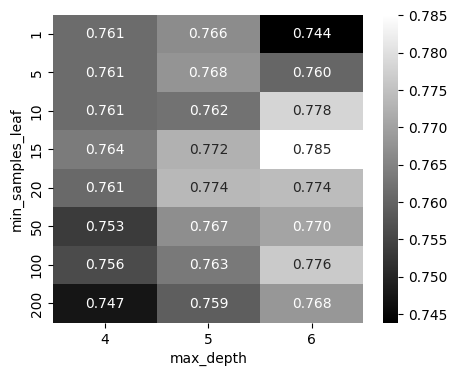

In [124]:
plt.figure(figsize=(5,4))
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f', cmap='gray');

In [125]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt)

0.7848562640769174

In [126]:
from sklearn.metrics import roc_curve

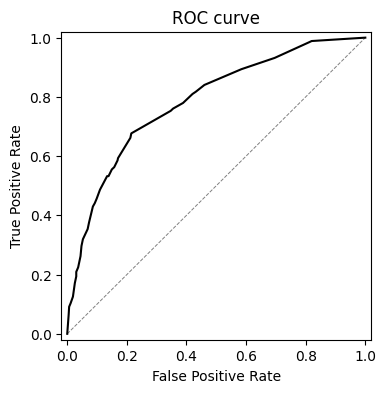

In [129]:
fpr, tpr, _ = roc_curve(y_val, y_pred_dt)

plt.figure(figsize=(4, 4))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## Random Forest

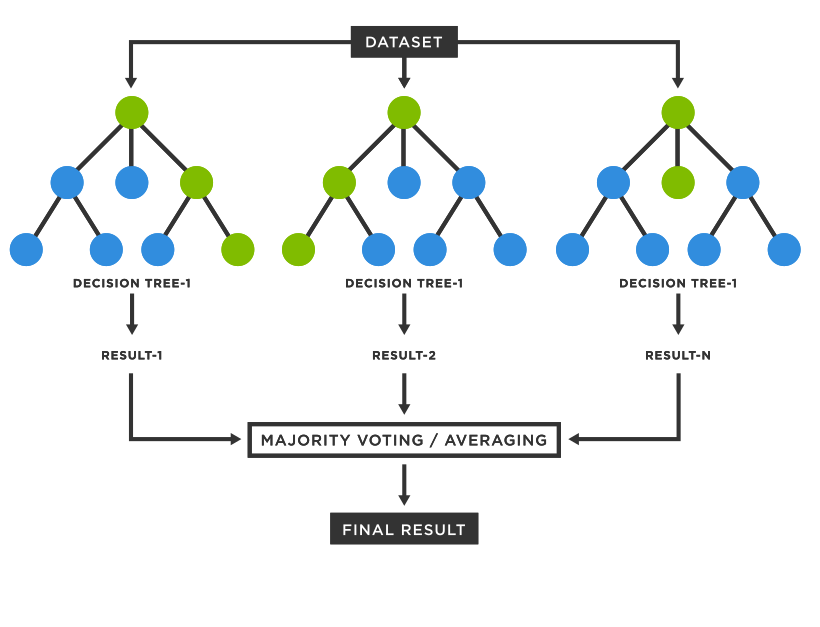

In [140]:
from IPython.display import SVG, display

display(SVG("https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg"))

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rf = RandomForestClassifier(n_estimators=10) # decision tree regressors (estimators) defaults to 100 in Scikit Learn.
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7749449032476812

If we repeat one more time - it changes:

In [132]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7934295609212662

To understand how much it changes, we can repeat it 100 times and look at the mean and the standard deviation

In [134]:
aucs = []

for i in range(100):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

print('%.3f +- %.3f' % (auc_mean, auc_std))
print('(%.3f, %.3f)' % (auc_mean - auc_std, auc_mean + auc_std))

0.785 +- 0.009
(0.777, 0.794)


To fix this issue, let's set the seed

In [135]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7811145285897654

Now we'll check how AUC depends on the number of trees

In [136]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)
    print('%4s -> %.3f' % (i, auc))

  10 -> 0.781
  20 -> 0.801
  30 -> 0.813
  40 -> 0.815
  50 -> 0.816
  60 -> 0.817
  70 -> 0.818
  80 -> 0.818
  90 -> 0.820
 100 -> 0.819
 110 -> 0.819
 120 -> 0.821
 130 -> 0.822
 140 -> 0.822
 150 -> 0.820
 160 -> 0.820
 170 -> 0.819
 180 -> 0.820
 190 -> 0.820
 200 -> 0.820


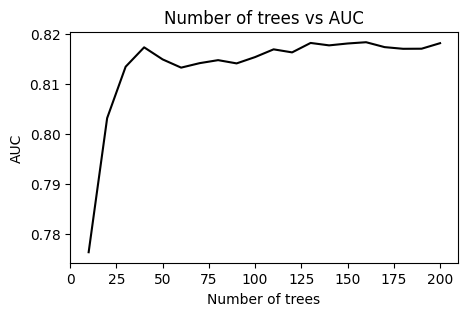

In [147]:
plt.figure(figsize=(5, 3))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 25))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators.svg')

plt.show()

Tuninig the `max_depth` parameter:

In [143]:
all_aucs = {}

for d in [5, 10, 20]:
    print('depth: (%s)' % d)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
        print('%4s -> %.3f' % (i, auc))
    
    all_aucs[d] = aucs
    print("-"*15)

depth: (5)
  10 -> 0.788
  20 -> 0.798
  30 -> 0.800
  40 -> 0.800
  50 -> 0.800
  60 -> 0.801
  70 -> 0.802
  80 -> 0.803
  90 -> 0.804
 100 -> 0.804
 110 -> 0.807
 120 -> 0.806
 130 -> 0.808
 140 -> 0.807
 150 -> 0.807
 160 -> 0.807
 170 -> 0.807
 180 -> 0.807
 190 -> 0.807
 200 -> 0.807
---------------
depth: (10)
  10 -> 0.791
  20 -> 0.808
  30 -> 0.812
  40 -> 0.818
  50 -> 0.817
  60 -> 0.819
  70 -> 0.820
  80 -> 0.820
  90 -> 0.820
 100 -> 0.821
 110 -> 0.823
 120 -> 0.823
 130 -> 0.825
 140 -> 0.824
 150 -> 0.824
 160 -> 0.825
 170 -> 0.825
 180 -> 0.825
 190 -> 0.825
 200 -> 0.825
---------------
depth: (20)
  10 -> 0.776
  20 -> 0.803
  30 -> 0.813
  40 -> 0.817
  50 -> 0.815
  60 -> 0.813
  70 -> 0.814
  80 -> 0.815
  90 -> 0.814
 100 -> 0.815
 110 -> 0.817
 120 -> 0.816
 130 -> 0.818
 140 -> 0.818
 150 -> 0.818
 160 -> 0.818
 170 -> 0.817
 180 -> 0.817
 190 -> 0.817
 200 -> 0.818
---------------


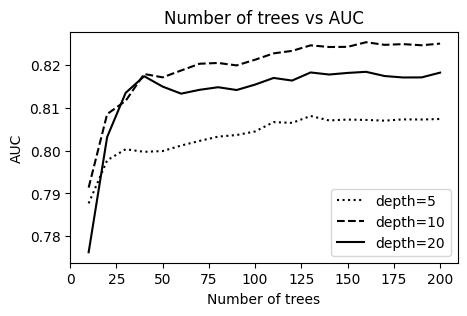

In [146]:
plt.figure(figsize=(5, 3))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 25))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()

Tuning the `min_samples_leaf` parameter

In [148]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
        print('%4s -> %.3f' % (i, auc))
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
  10 -> 0.811
  30 -> 0.823
  50 -> 0.823
  70 -> 0.822
  90 -> 0.823
 110 -> 0.823
 130 -> 0.824
 150 -> 0.825
 170 -> 0.825
 190 -> 0.825

min_samples_leaf: 5
  10 -> 0.813
  30 -> 0.818
  50 -> 0.821
  70 -> 0.822
  90 -> 0.822
 110 -> 0.825
 130 -> 0.825
 150 -> 0.825
 170 -> 0.825
 190 -> 0.826

min_samples_leaf: 10
  10 -> 0.810
  30 -> 0.822
  50 -> 0.822
  70 -> 0.819
  90 -> 0.820
 110 -> 0.820
 130 -> 0.821
 150 -> 0.820
 170 -> 0.820
 190 -> 0.820



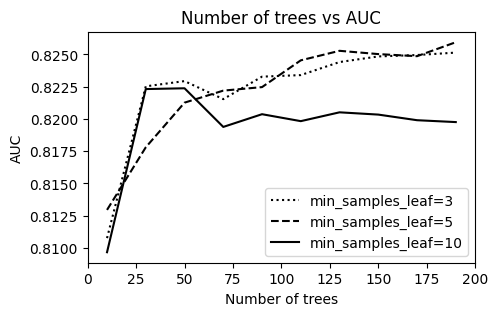

In [150]:
plt.figure(figsize=(5, 3))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 25))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_sample_leaf.svg')

plt.show()

Training the final model:

In [151]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [152]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

0.8253826499721489

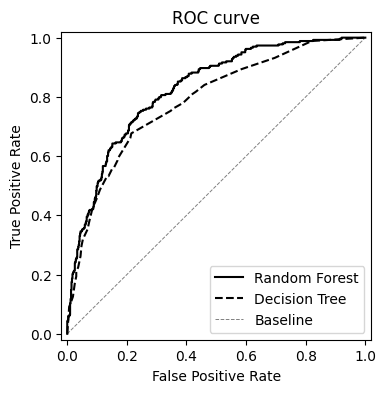

In [154]:
plt.figure(figsize=(4, 4))

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='black', label='Random Forest')

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='black', linestyle='dashed', label='Decision Tree')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5, label='Baseline')

plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## Gradient Booting Trees / XGBoost

In [156]:
import xgboost as xgb

In [157]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [176]:
xgb_params = {
    'eta': 0.3, # learning_rate: How fast our model learn.
    'max_depth': 6, # Size of trees.
    'min_child_weight': 1, # How many observations w should have in a leaf node

    'objective': 'binary:logistic', # logistic regression for binary classification, output probability.
    'nthread': 8, # Number of parallel threads used to run XGBoost. default to maximum number of threads available if not set.
    'seed': 1
}

In [177]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [178]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.08926772, 0.0468099 , 0.09692743, 0.17261842, 0.05435968,
       0.12576081, 0.08033007, 0.61870354, 0.486538  , 0.04056795],
      dtype=float32)

In [179]:
roc_auc_score(y_val, y_pred)

0.8152745150274878

In [180]:
# Watchlist contains datasets that we want to evaluate our model.
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [181]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

In [182]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.86300	val-auc:0.76818
[10]	train-auc:0.95002	val-auc:0.81558
[20]	train-auc:0.97316	val-auc:0.81775
[30]	train-auc:0.98772	val-auc:0.81787
[40]	train-auc:0.99456	val-auc:0.81387
[50]	train-auc:0.99688	val-auc:0.81128
[60]	train-auc:0.99889	val-auc:0.80801
[70]	train-auc:0.99944	val-auc:0.80732
[80]	train-auc:0.99985	val-auc:0.80677
[90]	train-auc:0.99992	val-auc:0.80637
[99]	train-auc:0.99998	val-auc:0.80546


To capture this output, we can use 

- `%%capture` instruction that saves the result to `output`
- `parse_xgb_output` function that parses it

In [183]:
%%capture output

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [195]:
s = output.stdout
print(s, type(s), sep='\n')

[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	train-auc:0.98174	val-auc:0.81878
[30]	train-auc:0.98772	val-auc:0.81787
[35]	train-auc:0.99180	val-auc:0.81510
[40]	train-auc:0.99456	val-auc:0.81387
[45]	train-auc:0.99596	val-auc:0.81462
[50]	train-auc:0.99688	val-auc:0.81128
[55]	train-auc:0.99787	val-auc:0.80874
[60]	train-auc:0.99889	val-auc:0.80801
[65]	train-auc:0.99919	val-auc:0.80751
[70]	train-auc:0.99944	val-auc:0.80732
[75]	train-auc:0.99964	val-auc:0.80692
[80]	train-auc:0.99985	val-auc:0.80677
[85]	train-auc:0.99986	val-auc:0.80671
[90]	train-auc:0.99992	val-auc:0.80637
[95]	train-auc:0.99996	val-auc:0.80580
[99]	train-auc:0.99998	val-auc:0.80546

<class 'str'>


In [190]:
print(s.strip().split('\n'))

['[0]\ttrain-auc:0.86300\tval-auc:0.76818', '[5]\ttrain-auc:0.92863\tval-auc:0.80606', '[10]\ttrain-auc:0.95002\tval-auc:0.81558', '[15]\ttrain-auc:0.96558\tval-auc:0.81680', '[20]\ttrain-auc:0.97316\tval-auc:0.81775', '[25]\ttrain-auc:0.98174\tval-auc:0.81878', '[30]\ttrain-auc:0.98772\tval-auc:0.81787', '[35]\ttrain-auc:0.99180\tval-auc:0.81510', '[40]\ttrain-auc:0.99456\tval-auc:0.81387', '[45]\ttrain-auc:0.99596\tval-auc:0.81462', '[50]\ttrain-auc:0.99688\tval-auc:0.81128', '[55]\ttrain-auc:0.99787\tval-auc:0.80874', '[60]\ttrain-auc:0.99889\tval-auc:0.80801', '[65]\ttrain-auc:0.99919\tval-auc:0.80751', '[70]\ttrain-auc:0.99944\tval-auc:0.80732', '[75]\ttrain-auc:0.99964\tval-auc:0.80692', '[80]\ttrain-auc:0.99985\tval-auc:0.80677', '[85]\ttrain-auc:0.99986\tval-auc:0.80671', '[90]\ttrain-auc:0.99992\tval-auc:0.80637', '[95]\ttrain-auc:0.99996\tval-auc:0.80580', '[99]\ttrain-auc:0.99998\tval-auc:0.80546']


In [193]:
[i.split('\t') for i in s.strip().split('\n')]

[['[0]', 'train-auc:0.86300', 'val-auc:0.76818'],
 ['[5]', 'train-auc:0.92863', 'val-auc:0.80606'],
 ['[10]', 'train-auc:0.95002', 'val-auc:0.81558'],
 ['[15]', 'train-auc:0.96558', 'val-auc:0.81680'],
 ['[20]', 'train-auc:0.97316', 'val-auc:0.81775'],
 ['[25]', 'train-auc:0.98174', 'val-auc:0.81878'],
 ['[30]', 'train-auc:0.98772', 'val-auc:0.81787'],
 ['[35]', 'train-auc:0.99180', 'val-auc:0.81510'],
 ['[40]', 'train-auc:0.99456', 'val-auc:0.81387'],
 ['[45]', 'train-auc:0.99596', 'val-auc:0.81462'],
 ['[50]', 'train-auc:0.99688', 'val-auc:0.81128'],
 ['[55]', 'train-auc:0.99787', 'val-auc:0.80874'],
 ['[60]', 'train-auc:0.99889', 'val-auc:0.80801'],
 ['[65]', 'train-auc:0.99919', 'val-auc:0.80751'],
 ['[70]', 'train-auc:0.99944', 'val-auc:0.80732'],
 ['[75]', 'train-auc:0.99964', 'val-auc:0.80692'],
 ['[80]', 'train-auc:0.99985', 'val-auc:0.80677'],
 ['[85]', 'train-auc:0.99986', 'val-auc:0.80671'],
 ['[90]', 'train-auc:0.99992', 'val-auc:0.80637'],
 ['[95]', 'train-auc:0.99996', 'v

In [200]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
        
    columns = ['tree', 'aucs_train', 'aucs_val']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

Let's use it for plotting the scores

In [201]:
df_score = parse_xgb_output(output)
df_score

,tree,aucs_train,aucs_val
0,0,0.86300,0.76818
1,5,0.92863,0.80606
2,10,0.95002,0.81558
3,15,0.96558,0.81680
4,20,0.97316,0.81775
5,25,0.98174,0.81878
6,30,0.98772,0.81787
7,35,0.99180,0.81510
8,40,0.99456,0.81387
9,45,0.99596,0.81462


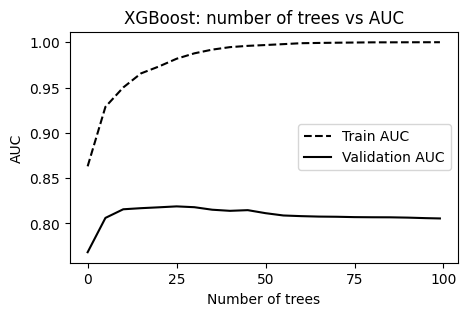

In [202]:
plt.figure(figsize=(5, 3))

plt.plot(df_score['tree'], df_score['aucs_train'], color='black', linestyle='dashed', label='Train AUC')
plt.plot(df_score['tree'], df_score['aucs_val'], color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

### Parameter tuning: eta

eta = 0.3

In [235]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist, verbose_eval=10)

In [236]:
df_score_eta_03 = parse_xgb_output(output)
print(max(df_score_eta_03.aucs_val))
print(max(zip(df_score_eta_03.aucs_val, df_score_eta_03.tree)))

0.81787
(0.81787, 30)


eta = 0.1

In [237]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist, verbose_eval=10)

In [238]:
df_score_eta_01 = parse_xgb_output(output)
print(max(df_score_eta_01.aucs_val))
print(max(zip(df_score_eta_01.aucs_val, df_score_eta_01.tree)))

0.82477
(0.82477, 70)


eta = 0.05

In [239]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist, verbose_eval=10)

In [240]:
df_score_eta_005 = parse_xgb_output(output)
print(max(df_score_eta_005.aucs_val))
print(max(zip(df_score_eta_005.aucs_val, df_score_eta_005.tree)))

0.82297
(0.82297, 120)


eta = 0.06

In [241]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist, verbose_eval=10)

In [242]:
df_score_eta_001 = parse_xgb_output(output)
print(max(df_score_eta_001.aucs_val))
print(max(zip(df_score_eta_001.aucs_val, df_score_eta_001.tree)))

0.82168
(0.82168, 499)


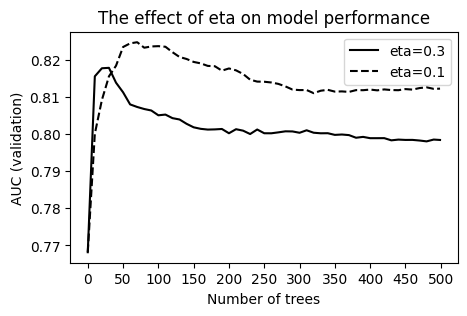

In [243]:
plt.figure(figsize=(5, 3))

plt.plot(df_score_eta_03['tree'], df_score_eta_03['aucs_val'], color='black', linestyle='solid', label='eta=0.3')
plt.plot(df_score_eta_01['tree'], df_score_eta_01['aucs_val'], color='black', linestyle='dashed', label='eta=0.1')
# plt.plot(df_score_eta_005['tree'], df_score_eta_005['aucs_val'], color='grey', linestyle='solid', label='eta=0.05')
# plt.plot(df_score_eta_001['tree'], df_score_eta_001['aucs_val'], color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 50))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta.svg')

plt.show()

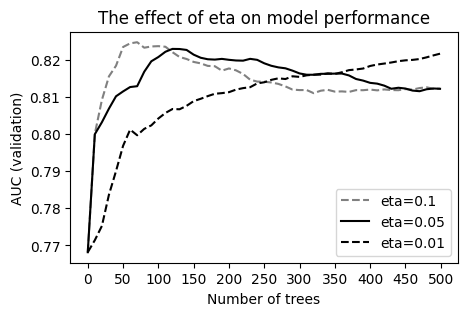

In [223]:
plt.figure(figsize=(5, 3))

plt.plot(aucs_val_eta_01['tree'], aucs_val_eta_01['aucs_val'], color='grey', linestyle='dashed', label='eta=0.1')
plt.plot(aucs_val_eta_005['tree'], aucs_val_eta_005['aucs_val'], color='black', linestyle='solid', label='eta=0.05')
plt.plot(aucs_val_eta_001['tree'], aucs_val_eta_001['aucs_val'], color='black', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 50))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta_2.svg')

plt.show()

eta = 0.1 seems the best parammeter.

### Parameter tuning: max_depth

max_depth = 3

In [244]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist, verbose_eval=10)

In [245]:
df_score_depth3 = parse_xgb_output(output)
print(max(df_score_depth3.aucs_val))
print(max(zip(df_score_depth3.aucs_val, df_score_depth3.tree)))

0.83657
(0.83657, 180)


max_depth = 6

In [246]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist, verbose_eval=10)

In [247]:
df_score_depth6 = parse_xgb_output(output)
print(max(df_score_depth6.aucs_val))
print(max(zip(df_score_depth6.aucs_val, df_score_depth6.tree)))

0.82477
(0.82477, 70)


max_depth = 10

In [248]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist, verbose_eval=10)

In [249]:
df_score_depth10 = parse_xgb_output(output)
print(max(df_score_depth10.aucs_val))
print(max(zip(df_score_depth10.aucs_val, df_score_depth10.tree)))

0.81169
(0.81169, 100)


With depth=3 it's better than depth=6 and depth=10. So let's try 4 to see if it's better than 3

In [251]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist, verbose_eval=10)

In [252]:
df_score_depth4 = parse_xgb_output(output)
print(max(df_score_depth4.aucs_val))
print(max(zip(df_score_depth4.aucs_val, df_score_depth4.tree)))

0.83014
(0.83014, 80)


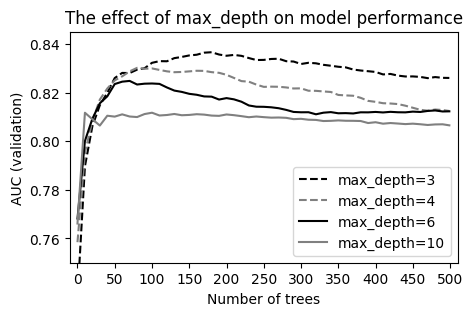

In [253]:
plt.figure(figsize=(5, 3))

plt.plot(df_score_depth3['tree'], df_score_depth3['aucs_val'], color='black', linestyle='dashed', label='max_depth=3')
plt.plot(df_score_depth4['tree'], df_score_depth4['aucs_val'], color='grey', linestyle='dashed', label='max_depth=4')
plt.plot(df_score_depth6['tree'], df_score_depth6['aucs_val'], color='black', linestyle='solid', label='max_depth=6')
plt.plot(df_score_depth10['tree'], df_score_depth10['aucs_val'], color='grey', linestyle='solid', label='max_depth=10')

plt.ylim(0.75, 0.845)
plt.xlim(-10, 510)
plt.xticks(range(0, 501, 50))

plt.legend()

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_depth.svg')

plt.show()

It's not better, so we'll leave it at max_depth = 3

### Tune "min_child_weight"

min_child_weight = 1

In [254]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist, verbose_eval=10)

In [255]:
df_score_mcw1 = parse_xgb_output(output)
print(max(df_score_mcw1.aucs_val))
print(max(zip(df_score_mcw1.aucs_val, df_score_mcw1.tree)))

0.83657
(0.83657, 180)


min_child_weight = 10

In [256]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist, verbose_eval=10)

In [257]:
df_score_mcw10 = parse_xgb_output(output)
print(max(df_score_mcw10.aucs_val))
print(max(zip(df_score_mcw10.aucs_val, df_score_mcw10.tree)))

0.83336
(0.83336, 150)


min_child_weight = 30

In [258]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist, verbose_eval=10)

In [259]:
df_score_mcw30 = parse_xgb_output(output)
print(max(df_score_mcw30.aucs_val))
print(max(zip(df_score_mcw30.aucs_val, df_score_mcw30.tree)))

0.83543
(0.83543, 160)


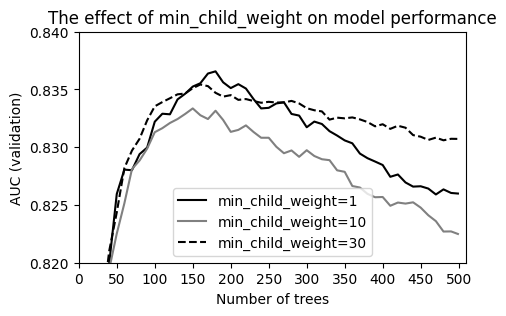

In [260]:
plt.figure(figsize=(5, 3))

plt.plot(df_score_mcw1['tree'], df_score_mcw1['aucs_val'], color='black', linestyle='solid', label='min_child_weight=1')
plt.plot(df_score_mcw10['tree'], df_score_mcw10['aucs_val'], color='grey', linestyle='solid', label='min_child_weight=10')
plt.plot(df_score_mcw30['tree'], df_score_mcw30['aucs_val'], color='black', linestyle='dashed', label='min_child_weight=30')

plt.ylim(0.82, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 50))
plt.yticks(np.linspace(0.82, 0.84, 5))

plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_mcw.svg')

plt.show()

## Checking the best number of trees

In [233]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist, verbose_eval=10)

In [234]:
print(output)

[0]	train-auc:0.77424	val-auc:0.73571
[10]	train-auc:0.84733	val-auc:0.78964
[20]	train-auc:0.86359	val-auc:0.80617
[30]	train-auc:0.87855	val-auc:0.81478
[40]	train-auc:0.88701	val-auc:0.81990
[50]	train-auc:0.89458	val-auc:0.82595
[60]	train-auc:0.90159	val-auc:0.82806
[70]	train-auc:0.90650	val-auc:0.82801
[80]	train-auc:0.91110	val-auc:0.82940
[90]	train-auc:0.91428	val-auc:0.82997
[100]	train-auc:0.91801	val-auc:0.83221
[110]	train-auc:0.92205	val-auc:0.83290
[120]	train-auc:0.92460	val-auc:0.83285
[130]	train-auc:0.92843	val-auc:0.83414
[140]	train-auc:0.93100	val-auc:0.83463
[150]	train-auc:0.93296	val-auc:0.83525
[160]	train-auc:0.93551	val-auc:0.83554
[170]	train-auc:0.93788	val-auc:0.83638
[180]	train-auc:0.93971	val-auc:0.83657
[190]	train-auc:0.94203	val-auc:0.83562
[200]	train-auc:0.94334	val-auc:0.83512
[210]	train-auc:0.94501	val-auc:0.83546
[220]	train-auc:0.94693	val-auc:0.83508
[230]	train-auc:0.94839	val-auc:0.83417
[240]	train-auc:0.94999	val-auc:0.83336
[250]	train

In [261]:
df_score = parse_xgb_output(output)
print(max(df_score.aucs_val))

0.83543


In [262]:
max(zip(df_score.aucs_val, df_score.tree))

(0.83543, 160)

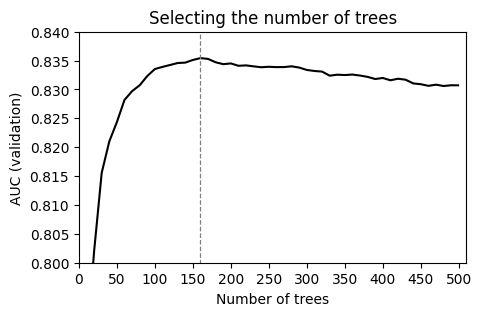

In [264]:
plt.figure(figsize=(5, 3))

plt.plot(df_score['tree'], df_score['aucs_val'], color='black', linestyle='solid')


plt.ylim(0.80, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 50))
plt.yticks(np.linspace(0.80, 0.84, 9))


plt.vlines(160, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Selecting the number of trees')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_number_trees.svg')

plt.show()

#### Final model

In [265]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=160,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.77424	val-auc:0.73571
[10]	train-auc:0.84733	val-auc:0.78964
[20]	train-auc:0.86359	val-auc:0.80617
[30]	train-auc:0.87855	val-auc:0.81478
[40]	train-auc:0.88701	val-auc:0.81990
[50]	train-auc:0.89458	val-auc:0.82595
[60]	train-auc:0.90159	val-auc:0.82806
[70]	train-auc:0.90650	val-auc:0.82801
[80]	train-auc:0.91110	val-auc:0.82940
[90]	train-auc:0.91428	val-auc:0.82997
[100]	train-auc:0.91801	val-auc:0.83221
[110]	train-auc:0.92205	val-auc:0.83290
[120]	train-auc:0.92460	val-auc:0.83285
[130]	train-auc:0.92843	val-auc:0.83414
[140]	train-auc:0.93100	val-auc:0.83463
[150]	train-auc:0.93296	val-auc:0.83525
[159]	train-auc:0.93552	val-auc:0.83542


In [266]:
y_pred_xgb = model.predict(dval)

In [267]:
roc_auc_score(y_val, y_pred_xgb)

0.8354211571528904

In [268]:
print(roc_auc_score(y_val, y_pred_dt))
print(roc_auc_score(y_val, y_pred_rf))
print(roc_auc_score(y_val, y_pred_xgb))

0.7848562640769174
0.8253826499721489
0.8354211571528904


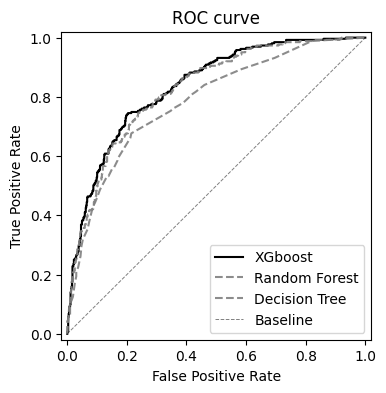

In [269]:
plt.figure(figsize=(4, 4))

fpr, tpr, _ = roc_curve(y_val, y_pred_xgb)
plt.plot(fpr, tpr, color='black', label='XGboost')

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9, label='Random Forest')

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9, label='Decision Tree')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5, label='Baseline')

plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## Final test

In [313]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
print("df ({}) => df_train_full ({}) + df_test ({})".format(len(df), len(df_train_full), len(df_test)))

df (4454) => df_train_full (3563) + df_test (891)


In [314]:
y_train_full = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

del df_train_full['status']
del df_test['status']

print("[df_train_full -> y_train_full] ({}) + [df_test -> y_test] ({})".format(len(y_train_full), len(y_test)))

[df_train_full -> y_train_full] (3563) + [df_test -> y_test] (891)


In [310]:
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [302]:
type(df_train_full), type(df_test), type(y_train_full), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 numpy.ndarray)

In [315]:
dict_train_full = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dict_train_full)
X_test = dv.transform(dict_test)

In [316]:
rf_final_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf_final_model.fit(X_train_full, y_train_full)

y_pred_rf = rf.predict_proba(X_test)[:, 1]

In [323]:
dtrain_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

num_trees = 160

xgb_final_model = xgb.train(xgb_params, dtrain_full, num_boost_round=num_trees)

y_pred_xgb = xgb_final_model.predict(dtest)

In [319]:
print(roc_auc_score(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_xgb))

0.8241777039245393
0.8322845901959826


## Bonus: feature importance

### Decision trees

In [111]:
dt.feature_importances_

array([0.01387723, 0.04793733, 0.1226385 , 0.00833288, 0.0250906 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18724799, 0.00699145, 0.        ,
       0.        , 0.17292753, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0302163 ,
       0.        , 0.24421676, 0.12152239, 0.01900104])

In [112]:
list(zip(dv.feature_names_, dt.feature_importances_))

[('age', 0.013877231876069153),
 ('amount', 0.04793733336664824),
 ('assets', 0.12263850423922844),
 ('debt', 0.008332876385504902),
 ('expenses', 0.025090602575881322),
 ('home=ignore', 0.0),
 ('home=other', 0.0),
 ('home=owner', 0.0),
 ('home=parents', 0.0),
 ('home=private', 0.0),
 ('home=rent', 0.0),
 ('home=unk', 0.0),
 ('income', 0.18724798934476602),
 ('job=fixed', 0.006991445659436667),
 ('job=freelance', 0.0),
 ('job=others', 0.0),
 ('job=partime', 0.17292752964348085),
 ('job=unk', 0.0),
 ('marital=divorced', 0.0),
 ('marital=married', 0.0),
 ('marital=separated', 0.0),
 ('marital=single', 0.0),
 ('marital=unk', 0.0),
 ('marital=widow', 0.0),
 ('price', 0.030216298419676543),
 ('records=no', 0.0),
 ('records=yes', 0.24421675762093445),
 ('seniority', 0.12152238957522045),
 ('time', 0.019001041293152915)]

In [113]:
importances = list(zip(dv.feature_names_, dt.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
26,records=yes,0.244217
12,income,0.187248
16,job=partime,0.172928
2,assets,0.122639
27,seniority,0.121522
1,amount,0.047937
24,price,0.030216
4,expenses,0.025091
28,time,0.019001
0,age,0.013877


In [114]:
df_importance = df_importance[df_importance.gain > 0]

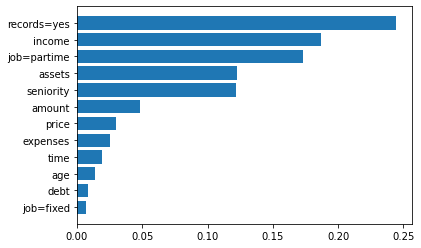

In [115]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

### Random forest

In [116]:
rf.feature_importances_

array([5.81509463e-02, 8.42444361e-02, 7.75901403e-02, 1.33739427e-02,
       3.62995916e-02, 1.26998064e-06, 5.25854792e-03, 2.57383446e-02,
       8.51497558e-03, 3.24437831e-03, 1.44619658e-02, 0.00000000e+00,
       1.50682384e-01, 4.78310889e-02, 9.96408243e-03, 2.85512508e-03,
       5.65260797e-02, 0.00000000e+00, 2.43128646e-04, 6.42996557e-03,
       1.68784119e-03, 6.67458246e-03, 0.00000000e+00, 1.97498337e-04,
       6.62193254e-02, 8.41683921e-02, 8.30420483e-02, 1.25453198e-01,
       3.11467205e-02])

In [117]:
importances = list(zip(dv.feature_names_, rf.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
12,income,0.150682
27,seniority,0.125453
1,amount,0.084244
25,records=no,0.084168
26,records=yes,0.083042
2,assets,0.077590
24,price,0.066219
0,age,0.058151
16,job=partime,0.056526
13,job=fixed,0.047831


In [118]:
df_importance = df_importance[df_importance.gain > 0.01]

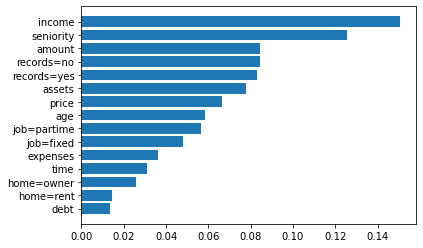

In [119]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

### XGBoost

In [120]:
scores = model.get_score(importance_type='gain')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('records=no', 20.205886174933337),
 ('job=partime', 19.571840249333327),
 ('job=fixed', 14.703467482368419),
 ('home=owner', 12.168287986666668),
 ('seniority', 10.93204644173191),
 ('income', 8.676314024586466),
 ('assets', 5.918307806556342),
 ('amount', 5.400780562827161),
 ('time', 5.0175909627586215),
 ('home=parents', 4.499092019090908),
 ('home=rent', 4.028717651875),
 ('price', 3.7946846306606075),
 ('expenses', 3.589669993872826),
 ('age', 3.318183602467891),
 ('debt', 2.9418528487777773),
 ('marital=separated', 2.641880279076923),
 ('home=private', 2.4620430769999997),
 ('marital=married', 2.427789335636364),
 ('home=other', 2.3016982833333333),
 ('job=freelance', 2.25929752),
 ('job=others', 1.61876595),
 ('home=ignore', 0.7887506362000001)]

In [121]:
scores = model.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('price', 165),
 ('amount', 162),
 ('assets', 142),
 ('income', 133),
 ('seniority', 119),
 ('age', 109),
 ('expenses', 92),
 ('debt', 63),
 ('records=no', 60),
 ('time', 29),
 ('home=parents', 22),
 ('job=partime', 21),
 ('job=fixed', 19),
 ('marital=separated', 13),
 ('home=private', 12),
 ('marital=married', 11),
 ('home=rent', 8),
 ('home=owner', 6),
 ('home=ignore', 5),
 ('job=freelance', 4),
 ('home=other', 3),
 ('job=others', 1)]

In [122]:
names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

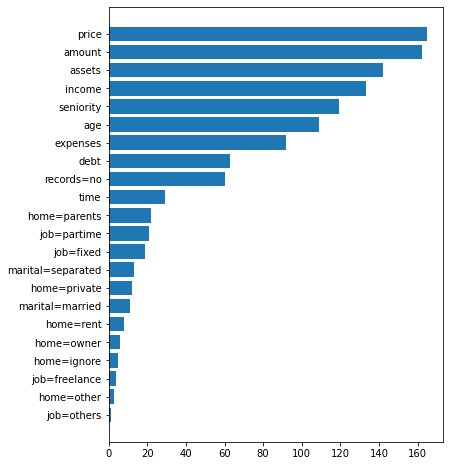

In [123]:
plt.figure(figsize=(6, 8))

plt.barh(np.arange(len(scores)), scores)
plt.yticks(np.arange(len(names)), names)

plt.show()

## Bonus: Extremely randomized trees

Similar to random forest, but more random. Instead of selecting the best split among all posible splits, ET picks a few candidate splits at random and then select the best one among them.

In [124]:
from sklearn.ensemble import ExtraTreesClassifier

In [125]:
aucs = []

for i in range(10, 201, 10):
    rf = ExtraTreesClassifier(n_estimators=i, max_depth=30)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.765
20 -> 0.785
30 -> 0.786
40 -> 0.782
50 -> 0.786
60 -> 0.790
70 -> 0.790
80 -> 0.791
90 -> 0.794
100 -> 0.790
110 -> 0.800
120 -> 0.787
130 -> 0.798
140 -> 0.792
150 -> 0.794
160 -> 0.796
170 -> 0.800
180 -> 0.797
190 -> 0.797
200 -> 0.797
